In [ ]:
import gensim.downloader as api
from csv import reader
from random import random
import pandas as pd
import sys
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files # Run this code to upload synonyms.csv
uploaded = files.upload()

Saving synonyms.csv to synonyms (1).csv


In [ ]:
#This is useless, this block doesn't do anything
url = 'https://raw.githubusercontent.com/RuslanDallin/AI-Project3/main/synonyms.csv?token=AQ66HUH3XR6EU7DYEQUYLOLBX3C7A'
dataFrame = pd.read_csv(url)
Synonyms = dataFrame.to_csv

In [ ]:
class ModelObj :
  ...
  def __init__(self, name, modelData):
    self.name = name
    self.modelData = modelData
    self.vocabSize = len(modelData.wv.index2word)

In [ ]:
c0 = api.load("word2vec-google-news-300")  

In [ ]:
c1 = api.load("glove-twitter-50")

In [ ]:
c2 = api.load("glove-wiki-gigaword-50")

In [ ]:
c3 = api.load("glove-twitter-100")

In [ ]:
c4 = api.load("glove-twitter-25")

In [ ]:
modelDic = {"word2vec-google-news-300": c0, "glove-twitter-50": c1, "glove-wiki-gigaword-50": c2, "glove-twitter-100": c3, "glove-twitter-25": c4}

In [ ]:
class ModelObj :
  def __init__(self, name, vocabularySize, C, V):
    self.name = name
    self.vocabularySize = vocabularySize
    self.C = C
    self.V = V
    self.accuracy = C/V

In [ ]:
modelList = []
for modelName, modelData in modelDic.items():
  f = open(modelName + "details.csv", 'w')
  sys.stdout = f
  # Task 1
  with open('synonyms.csv', 'r') as synonyms:
    vocabSize = len(modelData.wv.index2word) # size of vocabulary
    C = 0 # number of correct labels
    GuessCount = 0
    csvReader = reader(synonyms)
    lineNum = 0
    for line in csvReader:
      if lineNum != 0:
        optionExists = False

        questionWord = line[0]
        rightAnswer = line[1]
        fourOptions = {line[2]: 0, line[3]: 0, line[4]: 0, line[5]:0}

        if questionWord in modelData.index2word: # question word is in our vocabulary
          for key, value in fourOptions.items():
            if key in modelData.index2word:
              optionExists = True
              fourOptions[key] = modelData.similarity(questionWord,key)
          
          guessWord = max(fourOptions, key=fourOptions.get) #at least one guess word was in the vocabulary
          label = "correct" if guessWord == rightAnswer else "wrong"

        if optionExists == False or not questionWord in modelData.index2word: # none of the guess words are in our vocabulary OR question word isn't in our vocabulary
          for key, value in fourOptions.items():
            fourOptions[key] = random()

          guessWord = max(fourOptions, key=fourOptions.get)    
          label = "guess"
          GuessCount = GuessCount + 1

        C = C + 1 if label == "correct" else C
        print(questionWord + ', ' + rightAnswer + ', ' + guessWord + ', ' + label)
      lineNum = lineNum + 1
  modelList.append(ModelObj(modelName, vocabSize, C, C/(lineNum - GuessCount))) #creates objects of each model for stat purposes

In [ ]:
f.close()

In [ ]:
#Stats
a = open("analysis.csv",'w')
sys.stdout = a
for x in modelList:
  print(str(x.name) + ', ' + str(x.vocabularySize) + ', ' + str(x.C) + ', ' + str(x.V) + ', ' + str(x.accuracy))  

In [ ]:
a.close

<BarContainer object of 1 artists>

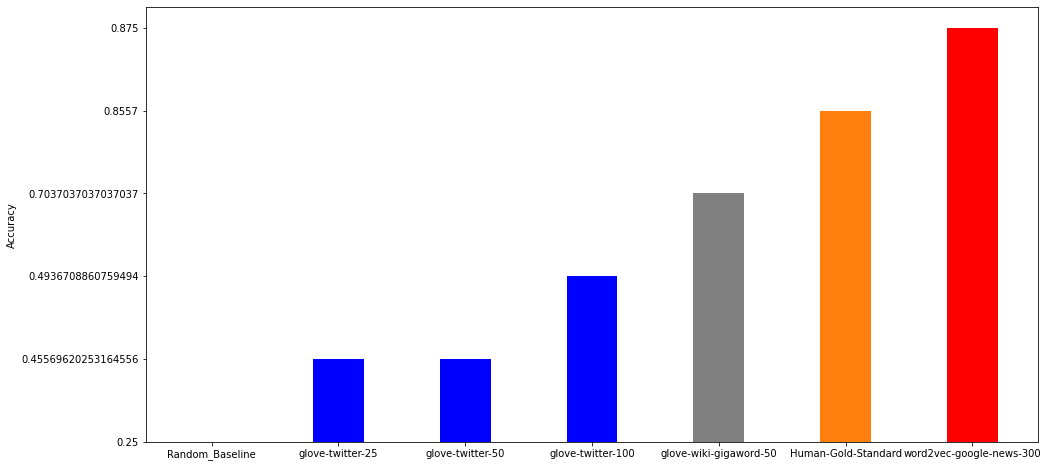

In [ ]:
fig = plt.figure(figsize = (16, 8))
plt.ylabel("Accuracy")
plt.bar('Random_Baseline','0.25', bottom = 0, width = 0.4)
# for x in modelList:
plt.bar(str(modelList[4].name),str(modelList[4].V),color = 'blue', width = 0.4)
plt.bar(str(modelList[1].name),str(modelList[1].V),color = 'blue', width = 0.4)
plt.bar(str(modelList[3].name),str(modelList[3].V),color = 'blue', width = 0.4)
plt.bar(str(modelList[2].name),str(modelList[2].V),color = 'gray', width = 0.4)
plt.bar('Human-Gold-Standard','0.8557', bottom = 0, width = 0.4)
plt.bar(str(modelList[0].name),str(modelList[0].V),color = 'red', width = 0.4)